In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)

<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/lj_reco_efficiency/../../../sidm/tools/utilities.py'>

In [2]:
samples = [
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_5GeV_2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        "2mu2e",
        
        
        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

Text(0.5, 0.98, 'Pt for leptons in no selection channel ')

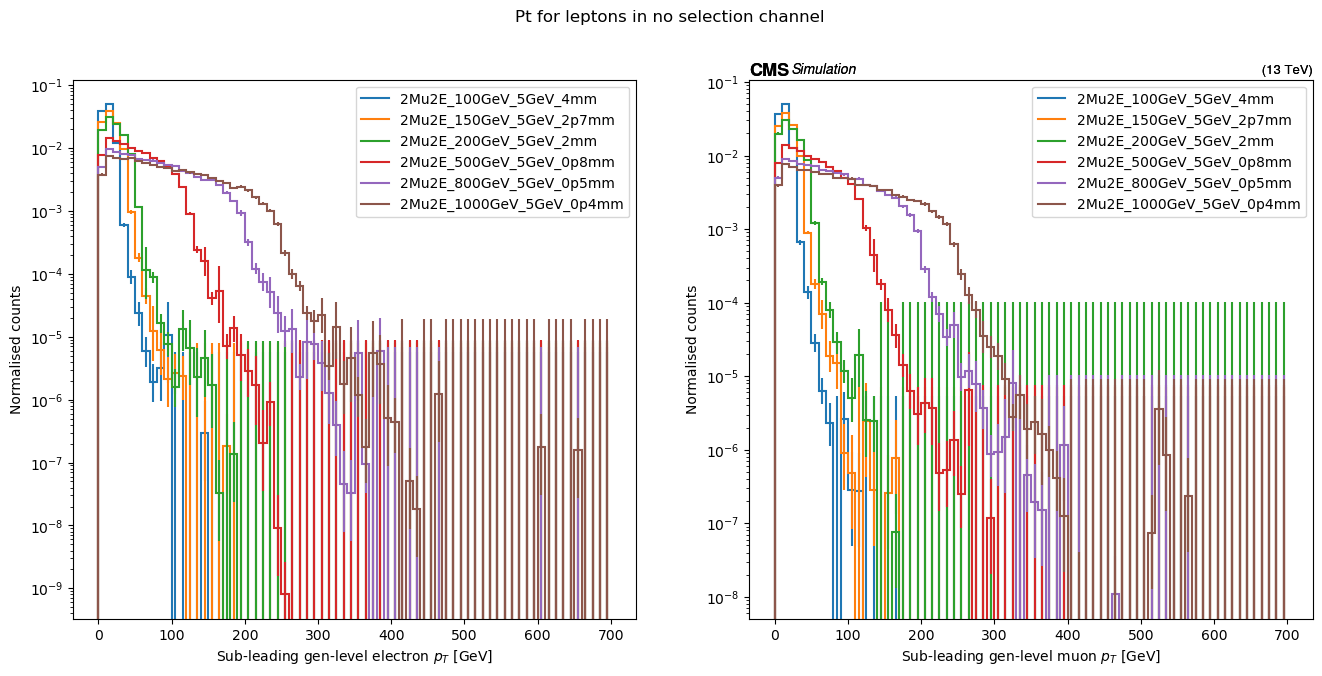

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))
ch1 ="baseNoLj"
ch2="2mu2e"
utilities.plot([output["out"][f"{name}"]["hists"]["genE1_pt_highRange"][ch1,:] for name in samples], ax=ax1, density=True)
utilities.plot([output["out"][f"{name}"]["hists"]["genMu1_pt_highRange"][ch1,:] for name in samples], ax=ax2, density=True)
ax1.legend(samples)
ax2.legend(samples)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylabel("Normalised counts")
ax2.set_ylabel("Normalised counts")
plt.suptitle(r"Pt for leptons in no selection channel ") 

Text(0.5, 0.98, 'Pt for leptons in 2mu2e selection channel ')

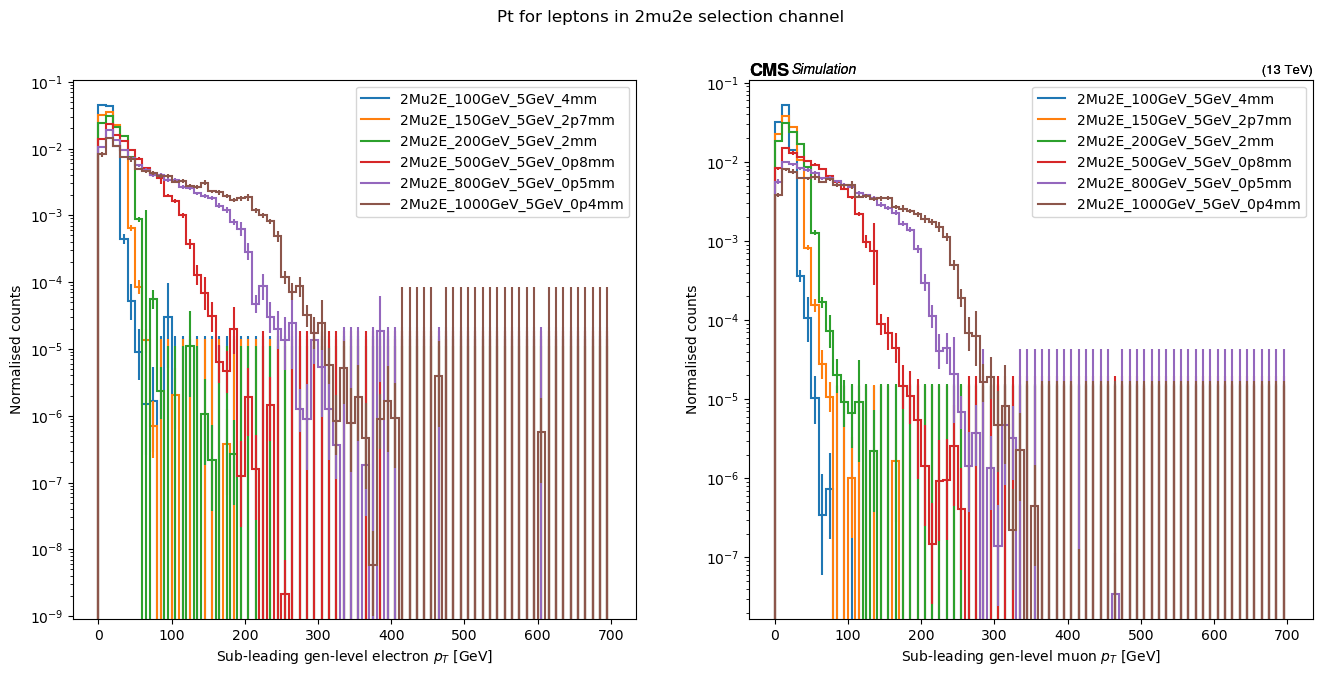

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))

utilities.plot([output["out"][f"{name}"]["hists"]["genE1_pt_highRange"][ch2,:] for name in samples], ax=ax1, density=True)
utilities.plot([output["out"][f"{name}"]["hists"]["genMu1_pt_highRange"][ch2,:] for name in samples], ax=ax2, density=True)
ax1.legend(samples)
ax2.legend(samples)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylabel("Normalised counts")
ax2.set_ylabel("Normalised counts")
plt.suptitle(r"Pt for leptons in 2mu2e selection channel ") 

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_4mm')

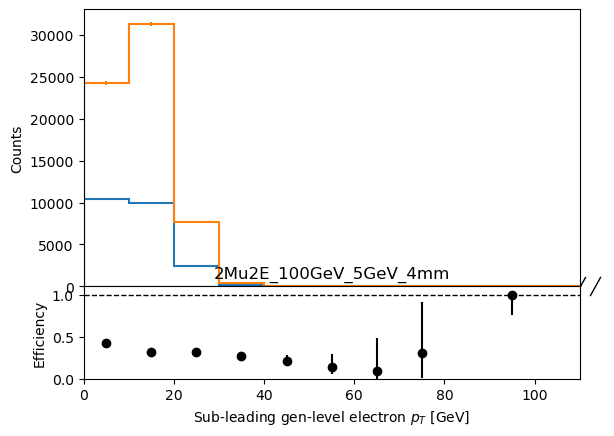

In [6]:
output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genE1_pt_highRange"][ch2,:115j].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genE1_pt_highRange"][ch1,:115j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_4mm")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_4mm')

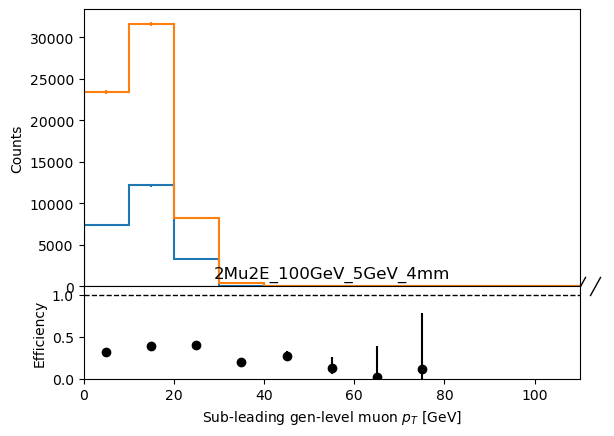

In [7]:
output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genMu1_pt_highRange"][ch2,:115j].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genMu1_pt_highRange"][ch1,:115j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_4mm")

Text(0.5, 1.0, '2Mu2E_150GeV_5GeV_2p7mm')

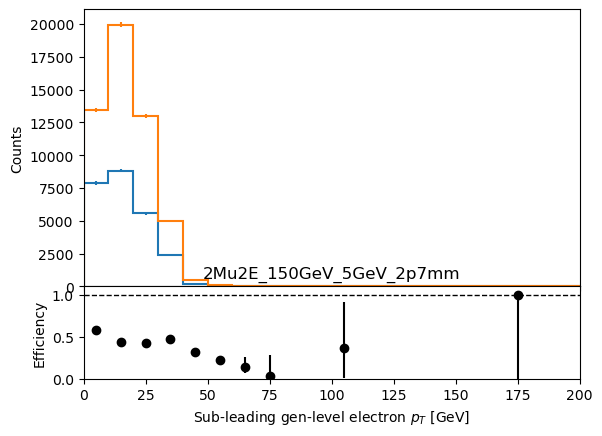

In [8]:
output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genE1_pt_highRange"][ch2,:200j].plot_ratio(
       output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genE1_pt_highRange"][ch1,:200j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_150GeV_5GeV_2p7mm")

Text(0.5, 1.0, '2Mu2E_150GeV_5GeV_2p7mm')

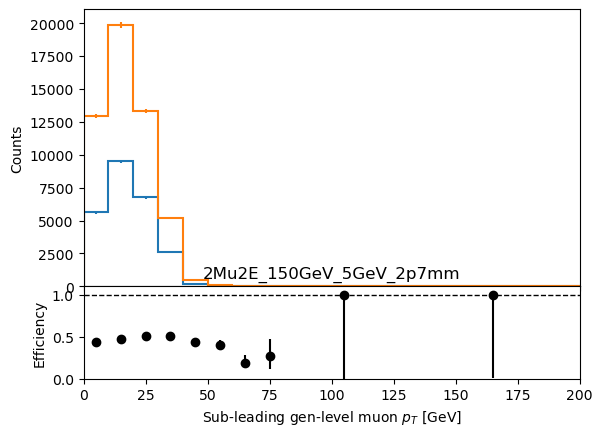

In [9]:
output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu1_pt_highRange"][ch2,:200j].plot_ratio(
       output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu1_pt_highRange"][ch1,:200j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_150GeV_5GeV_2p7mm")

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_2mm')

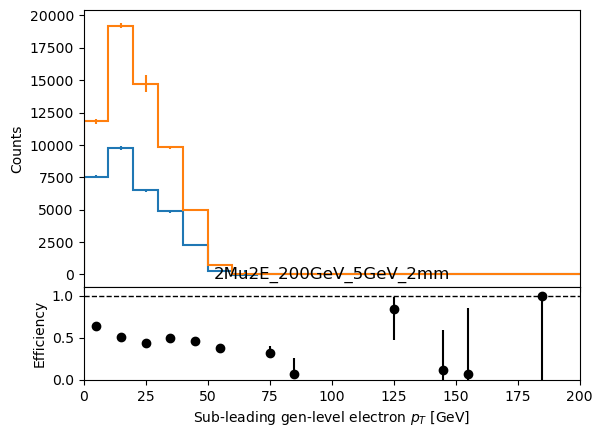

In [10]:
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE1_pt_highRange"][ch2,:200j].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE1_pt_highRange"][ch1,:200j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_2mm")

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_2mm')

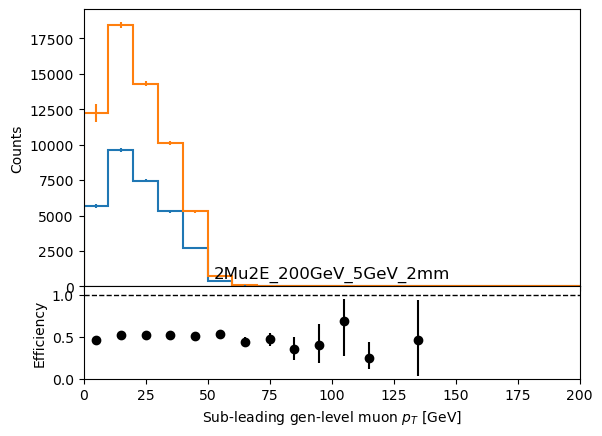

In [11]:
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu1_pt_highRange"][ch2,:200j].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu1_pt_highRange"][ch1,:200j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_2mm")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_0p8mm')

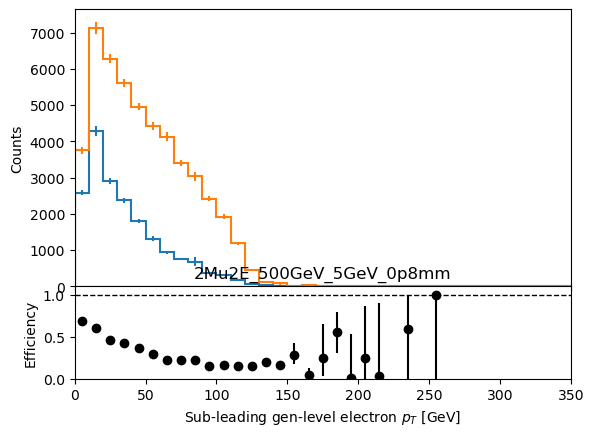

In [12]:
output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genE1_pt_highRange"][ch2,:350j].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genE1_pt_highRange"][ch1,:350j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_0p8mm")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_0p8mm')

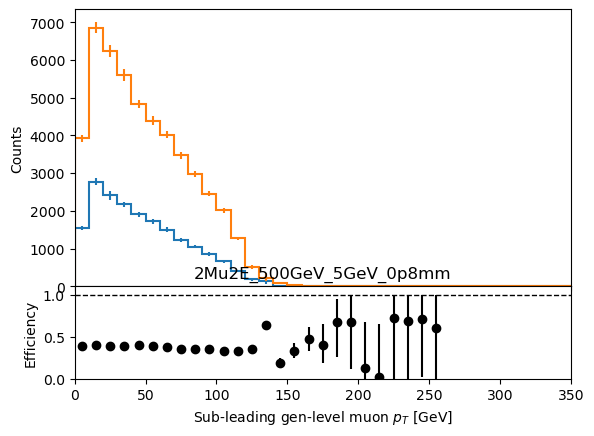

In [13]:
output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genMu1_pt_highRange"][ch2,:350j].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genMu1_pt_highRange"][ch1,:350j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_0p8mm")

Text(0.5, 1.0, '2Mu2E_800GeV_5GeV_0p5mm')

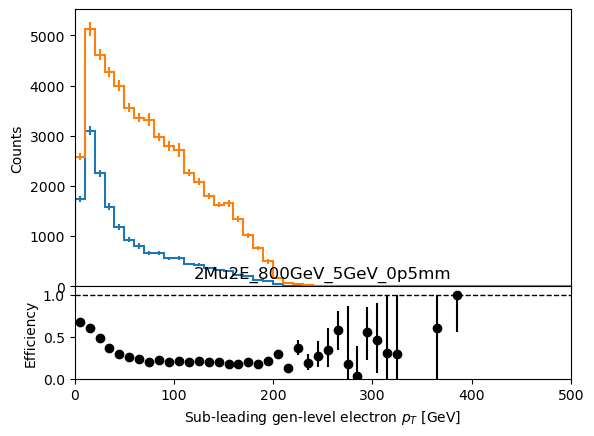

In [14]:
output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genE1_pt_highRange"][ch2,:500j].plot_ratio(
       output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genE1_pt_highRange"][ch1,:500j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_800GeV_5GeV_0p5mm")

Text(0.5, 1.0, '2Mu2E_800GeV_5GeV_0p5mm')

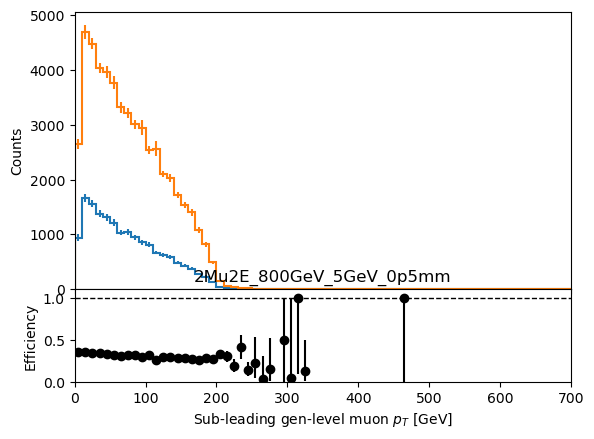

In [15]:
output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genMu1_pt_highRange"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genMu1_pt_highRange"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_800GeV_5GeV_0p5mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_0p4mm')

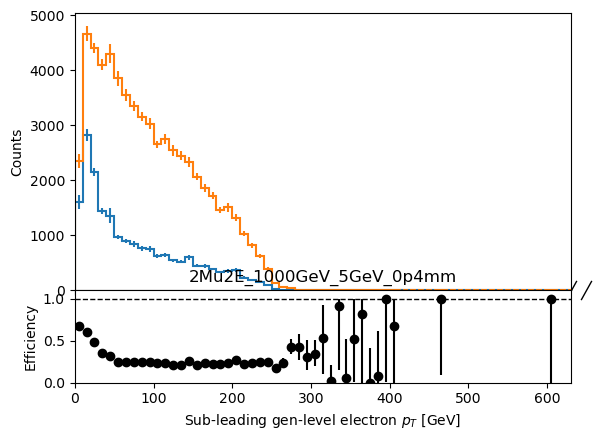

In [16]:
output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genE1_pt_highRange"][ch2,:635j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genE1_pt_highRange"][ch1,:635j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_0p4mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_0p4mm')

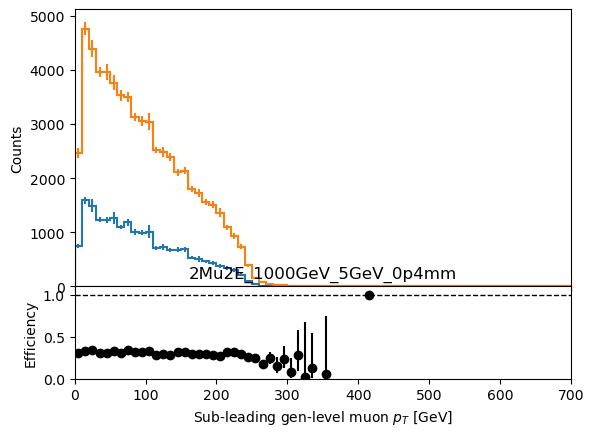

In [17]:
output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genMu1_pt_highRange"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genMu1_pt_highRange"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_0p4mm")